In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error

# 1. Подготовка датасета

#### Загрузим датасет

In [25]:
df = pd.read_csv('Boston.csv')

#### Описание данных

- CRIM - уровень преступности на душу населения в разбивке по городам;
- ZN - доля жилой земли, зонированной для участков площадью более 25000 кв.футов;
- INDUS - доля акров, не связанных с розничной торговлей, в каждом городе;
- CHAS - фиктивная переменная реки Чарльз (= 1, если участок ограничивает реку; 0 в противном случае);
- NOX - концентрация оксидов азота NOX (частей на 10 миллионов);
- RM - среднее количество комнат в жилище;
- AGE - доля домов, построенных до 1940 года, занимаемых владельцами;
- DIS - взвешенные расстояния до пяти бостонских центров занятости;
- RAD - индекс доступности к радиальным магистралям;
- TAX - полная ставка налога на недвижимость за 10000 долларов США;
- PTRATIO - соотношение учеников и учителей по городам;
- B - 1000 (Bk — 0,63) ^ 2, где Bk — доля чернокожего населения по городам;
- LSTAT - процент населения с более низким статусом;
- MEDV – медианная цена домов, занимаемых владельцами, в 1000 долл.

#### Выведем данные

In [26]:
df.drop(labels='Unnamed: 0', axis=1, inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### Выведем информации о датасете

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


#### Приведём данные к одному типу данных

In [31]:
df['chas'] = df['chas'].astype(float)
df['rad'] = df['rad'].astype(float)
df['tax'] = df['tax'].astype(float)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### Выведем основные статистические показатели

In [33]:
df.describe().round(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


#### Посмотрим количество пропущенных значений

In [34]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

# 2. Анализ целевых переменных

#### Построим гистрограмму целевой переменной

D:\Programs\Python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


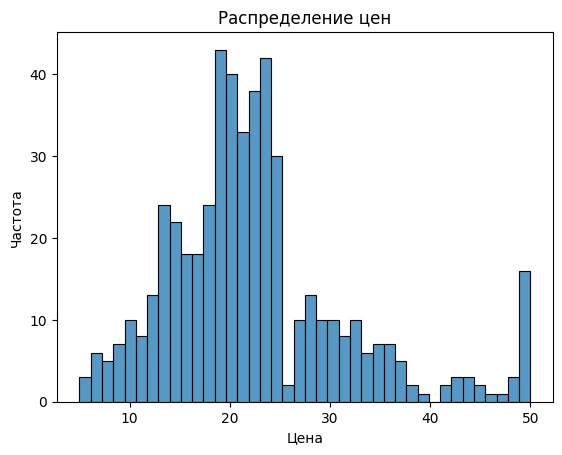

In [36]:
sns.histplot(df['medv'], bins=40)
plt.ylabel('Частота')
plt.xlabel('Цена')
plt.title('Распределение цен')
plt.show()

# 3. Исследовательский анализ данных

#### Выведем корреляционную матрицу

In [38]:
corr_matrix = df.corr().round(2)
corr_matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
zn,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
indus,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
chas,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
nox,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
rm,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
age,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
dis,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
rad,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
tax,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


#### Построим тепловую карту. 
- Переменные (признаки) RM и LSTAT имеют достаточно сильную корреляцию с целевой переменной MEDV, 0,70 и −0,74, соответственно.
- Сильную мультиколлинеарность имеют пары признаков RAD-TAX со значением “0.91” и AGE-DIS со значением “- 0.75”. Мы не должны выбирать такие пары вместе для обучения модели.

<Axes: >

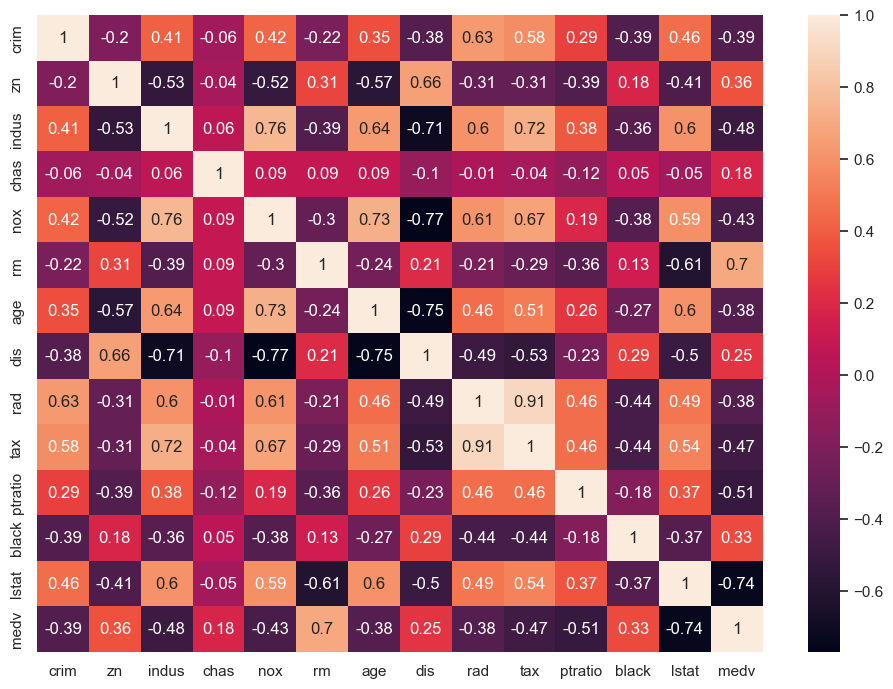

In [39]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=corr_matrix, annot=True)

#### Визуализация взаимосвязи

In [40]:
x1 = df['lstat']
x2 = df['rm']
y = df['medv']

Text(0.5, 1.0, 'Социальный статус населения и цена на жильё')

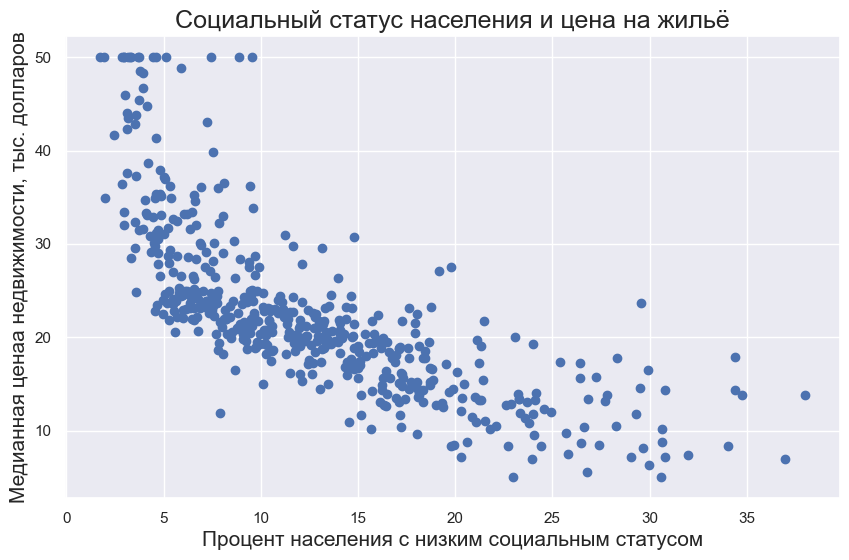

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(x1, y)

plt.xlabel('Процент населения с низким социальным статусом', fontsize=15)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize=15)
plt.title('Социальный статус населения и цена на жильё', fontsize=18)

Text(0.5, 1.0, 'Среднее количество комнат и цены на жильё')

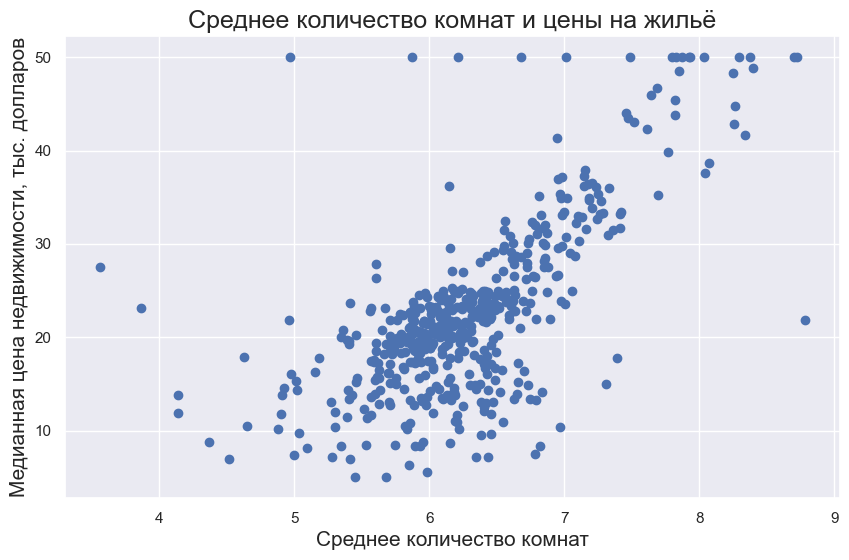

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(x2, y)

plt.xlabel('Среднее количество комнат', fontsize=15)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize=15)
plt.title('Среднее количество комнат и цены на жильё', fontsize=18)

# 4. Отбор и выделение признаков

#### Выделим признаки

In [44]:
X = df[['rm', 'lstat', 'ptratio', 'tax', 'indus']]
y = df['medv']

#### Разделим выборку на тренировочную и тестовую

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)

#### Посмотрим размерность новых наборов данных

In [47]:
X_train.shape, y_train.shape

((354, 5), (354,))

In [48]:
X_test.shape, y_test.shape

((152, 5), (152,))

# 5. Обучение модели LinearRegression

In [51]:
model = LinearRegression()

In [52]:
model.fit(X_train, y_train)

LinearRegression()

#### Выведем смещение и коэффициенты (веса) линейной модели

In [53]:
model.intercept_

17.150526471659674

In [54]:
model.coef_

array([ 4.58472965e+00, -6.14838082e-01, -8.30469649e-01, -3.21801353e-03,
        8.89192908e-02])

#### Сделаем прогноз цен на тестовой выборке

In [64]:
y_pred = model.predict(X_test)

In [65]:
y_pred[:5]

array([26.62981059, 31.10008241, 16.95701338, 25.59771173, 18.09307064])

#### Посмотрим метрики

In [68]:
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error (RMSE): 5.107447670220914


# 6. Обучение модели LinearRegression с применением регуляризации

In [70]:
model_ridge = linear_model.Ridge(alpha=0.5)

In [71]:
model_ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [73]:
model_ridge.intercept_

17.311924443577848

In [74]:
model_ridge.coef_

array([ 4.56369503e+00, -6.16034781e-01, -8.31342057e-01, -3.20280446e-03,
        8.85851144e-02])

In [75]:
y_pred = model_ridge.predict(X_test)

In [76]:
y_pred[:5]

array([26.63409878, 31.10147072, 16.95494507, 25.60920504, 18.08780463])

In [77]:
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error (RMSE): 5.10760824136713
